<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  \
Student1 Name: 

Student2 ID: \
Student2 Name: 

Student3 ID: \
Student3 Name: 

( Student4 ID: \
Student4 Name: )

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

100%|██████████| 169001437/169001437 [00:11<00:00, 14685814.97it/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

In [ ]:
def visualize_cifar100_superclasses(train_set, superclasses):
    data, labels = train_set.data, train_set.targets
    fig, ax = plt.subplots(len(superclasses), 3 + 1, figsize=(15, 2 * len(superclasses)))

    for i, (superclass, subclasses) in enumerate(superclasses.items()):
        ax[i, 0].text(0.0, 0.5, superclass, fontsize=15)
        ax[i, 0].axis('off')

        for j, subclass in enumerate(subclasses[:3]):
            name = classes.index(subclass)
            image = np.where(np.array(labels) == name)[0][0]
            ax[i, j + 1].imshow(data[image])
            ax[i, j + 1].set_title(subclass, fontsize=15)
            ax[i, j + 1].axis('off')

    plt.tight_layout()
    plt.show()

visualize_cifar100_superclasses(train_set, superclasses)



<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [4]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

twolayer = TwoLayerNet(input_size=3*32*32, hidden_size=512, num_classes=100)

<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [ ]:
class ConvNet(nn.Module):

    def __init__(self, num_classes):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''
        super(ConvNet, self).__init__()
        self.c1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.s2 = nn.AvgPool2d(kernel_size = 2)
        self.tanh = nn.Tanh()
        self.c3 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.s4 = nn.AvgPool2d(kernel_size = 2)
        self.c5 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
        self.f6 = nn.Linear(120, 84)
        self.out = nn.Linear(84, num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = self.c1(x)
        x = self.s2(x)
        x = self.tanh(x)
        x = self.c3(x)
        x = self.s4(x)
        x = self.tanh(x)
        x = self.c5(x)
        x = self.tanh(x)
        x = x.view(-1, 120)
        x = self.f6(x)
        x = self.tanh(x)
        x = self.out(x)
        
        return x
convnet = ConvNet(num_classes=100)

<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [5]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
    
        # YOUR CODE HERE
        # Set class attributes
        self.data = datasets.CIFAR100(
            root=root,
            train=train, 
            transform=transform, 
            download=download
        )
        

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        # YOUR CODE HERE
        return len(self.data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        # YOUR CODE HERE
        return self.data[idx]

In [6]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    # YOUR CODE HERE
    train_transformed = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
    ])
    test_transformed = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
    ])
    return train_transformed, test_transformed

In [7]:
def create_optimizer(model, learning_rate=0.001):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    # YOUR CODE HERE
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return optimizer

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [8]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [9]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [36]:
from tqdm import tqdm 
def train(net, train_loader, criterion, optimizer, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    # YOUR CODE HERE

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)
    net.train()

    # Iterate over the training dataset for the specified number of epochs
    for epoch in range(epochs):

        running_loss = 0.0
        batch_loss = 0.0

        progress_bar = tqdm(enumerate(train_loader, 0), total=len(train_loader), desc=f"Epoch [{epoch + 1}/{epochs}]")

        # Iterate over the training dataset
        for i, data in progress_bar:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()  
            batch_loss += loss.item()    

            if (i + 1) % 100 == 0:
                average_batch_loss = batch_loss / 100
                print(f'Epoch [{epoch + 1}/{epochs}], Batch [{i + 1}/{len(train_loader)}], Batch Loss: {average_batch_loss:.4f}')
                batch_loss = 0.0  # Reset batch loss

        avg_loss = running_loss / len(train_loader)
        print(f'Epoch [{epoch + 1}/{epochs}] completed, Average Epoch Loss: {avg_loss:.4f}')

    print('Finished Training')
    


First, initialize the datasets and data loaders for both models.

In [ ]:
# YOUR CODE HERE
train_transform, test_transform = create_transforms()

train_transformed = CIFAR100_loader(root='./data', train=True, transform=train_transform, download=False)
test_transformed = CIFAR100_loader(root='./data', train=False, transform=test_transform, download=False)

print(f'Number of samples in train_transformed: {len(train_transformed)}')


train_loader = DataLoader(train_transformed, batch_size=512, shuffle=True)
test_loader = DataLoader(test_transformed, batch_size=512, shuffle=False)

print(f'Number of batches in train_loader: {len(train_loader)}')


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [ ]:
# YOUR CODE HERE
# train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.
input_size = 3 * 32 * 32
hidden_size = 512
num_classes = 100

model = TwoLayerNet(input_size, hidden_size, num_classes)
model.to(device)
optimizer = create_optimizer(model)
criterion = nn.CrossEntropyLoss()

train(model, train_loader, criterion, optimizer, epochs=100)
validate(model, test_loader)
validate_per_class(model, test_loader, classes)


Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [ ]:
# YOUR CODE HERE
# train the ConvNet model on the CIFAR-100 dataset using the training data loader.
model = ConvNet()
model.to(device)
optimizer = create_optimizer(model)
criterion = nn.CrossEntropyLoss()

train(model, train_loader, criterion, optimizer, epochs=100)
validate(model, test_loader)
validate_per_class(model, test_loader, classes)

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

In [16]:
def create_optimizer1(model, learning_rate=0.001, opt_type = 'Adam', w=0):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    ''' 

    if opt_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=w)
    elif opt_type == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=w)
        
    return optimizer

In [ ]:
def avg_accuracy1(model, data_loader, class_names):
    """
    Calculate average accuracy per class for a given model and data_loader.

    Parameters:
    - model: The trained model (e.g., ConvNet or TwoLayerNet)
    - data_loader: DataLoader for test/validation dataset
    - class_names: List of class names (or number of classes)

    Returns:
    - avg_accuracy_per_class: Average accuracy across all classes
    """

    # Set model to evaluation mode
    model.eval()
    
    correct = torch.zeros(len(class_names))  # Correct predictions per class
    total = torch.zeros(len(class_names))    # Total predictions per class
    
    with torch.no_grad():  # No need to track gradients for evaluation
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU (if available)
            
            # Forward pass to get predictions
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get predicted class labels
            
            # Count correct predictions per class
            for i in range(len(labels)):
                label = labels[i]
                total[label] += 1
                if predicted[i] == label:
                    correct[label] += 1
    
    # Calculate accuracy per class
    accuracy_per_class = 100 * correct / total
    avg_accuracy_per_class = accuracy_per_class.mean().item()  # Mean accuracy over all classes
    
    print("Accuracy per class:", accuracy_per_class)
    print("Average accuracy across all classes: {:.2f}%".format(avg_accuracy_per_class))
    
    return avg_accuracy_per_class

In [ ]:
input_size = 3 * 32 * 32
hidden_size = 512
num_classes = 100

# Testing different values of hyperparameters

learning_rates = [0.001]
batch_sizes = [256]
epochs = [1]
optimizers = ['SGD']
weight_decays = [0.001, 0.01]
transform_functions = ['random']
batch_normalization = []

hyper_params = [learning_rates, batch_sizes, epochs, optimizers, weight_decays, transform_functions]#, batch_normaliztion]
str_hyper_params = ['learning_rates', 'batch_sizes', 'epochs', 'optimizers', 'weight_decays', 'transform_functions']


# 'Frozen' values
l_ = 0.01
b_ = 512
e_ = 1
o_ = 'Adam'
w_ = 0
t_ = 'random'
#n_ = 

params_default_conv = [l_, b_, e_, o_, w_, t_]#, n_]
params_default_2lay = [l_, b_, e_, o_, w_, t_]


all_models_conv, all_models_2lay, all_accs_conv, all_accs_2lay = [], [], [], []


for i, param_list in enumerate(hyper_params):
    print('\nTESTING FOR:', str_hyper_params[i])
    models_conv, models_2lay, accuracies_conv, accuracies_2lay = [], [], [], []
    params_conv = params_default_conv.copy()
    params_2lay = params_default_2lay.copy()

    for p in param_list:
        params_conv[i] = p
        params_2lay[i] = p

        [l_conv, b_conv, e_conv, o_conv, w_conv, t_conv] = params_conv
        [l_2lay, b_2lay, e_2lay, o_2lay, w_2lay, t_2lay] = params_2lay

        print('Parameter values conv: ', params_conv)
        print('Parameter values 2lay: ', params_2lay, '\n')

        train_transform_conv, test_transform_conv = create_transforms(t_conv)
        train_transform_2lay, test_transform_2lay = create_transforms(t_2lay)

        train_transformed_conv = CIFAR100_loader(root='./data', train=True, transform=train_transform_conv, download=False)
        train_transformed_2lay = CIFAR100_loader(root='./data', train=True, transform=train_transform_2lay, download=False)
        test_transformed = CIFAR100_loader(root='./data', train=False, transform=test_transform_conv, download=False)

        train_loader_conv = DataLoader(train_transformed_conv, batch_size=b_conv, shuffle=True)
        train_loader_2lay = DataLoader(train_transformed_2lay, batch_size=b_2lay, shuffle=True)
        
        test_loader_conv = DataLoader(test_transformed, batch_size=b_conv, shuffle=False)
        test_loader_2lay = DataLoader(test_transformed, batch_size=b_2lay, shuffle=False)

        model_conv = ConvNet(num_classes)
        model_2lay = TwoLayerNet(input_size, hidden_size, num_classes)

        model_conv.to(device)
        model_2lay.to(device)

        optimizer_conv = create_optimizer1(model_conv, l_conv, o_conv, w_conv)
        optimizer_2lay = create_optimizer1(model_2lay, l_2lay, o_2lay, w_2lay)

        criterion_conv = nn.CrossEntropyLoss()
        criterion_2lay = nn.CrossEntropyLoss()

        train(model_conv, train_loader_conv, criterion_conv, optimizer_conv, e_conv)
        train(model_2lay, train_loader_2lay, criterion_2lay, optimizer_2lay, e_2lay)

        acc_per_class_conv = avg_accuracy1(model_conv, test_loader_conv, classes)
        acc_per_class_2lay = avg_accuracy1(model_2lay, test_loader_2lay, classes)

        models_conv.append(model_conv)
        models_2lay.append(model_2lay)
        accuracies_conv.append(acc_per_class_conv)
        accuracies_2lay.append(acc_per_class_2lay)
    
    max_idx_conv = accuracies_conv.index(max(accuracies_conv))
    max_idx_2lay = accuracies_2lay.index(max(accuracies_2lay))

    params_default_conv[i] = param_list[max_idx_conv]
    params_default_2lay[i] = param_list[max_idx_2lay]    
    
    all_models_conv.append(models_conv)
    all_models_2lay.append(models_2lay)
    all_accs_conv.append(accuracies_conv)
    all_accs_2lay.append(accuracies_2lay)


Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [17]:
def print_results(accs_conv, accs_2lay, hyper_params, default_params, str_params):
    for i, param_values in enumerate(hyper_params):
        print('\nHyperparameter: %s'%str_params[i])
        for j, p in enumerate(param_values):
            print('Value: ', p, '    Accuracy conv: ', accs_conv[i][j], '    Accuracy: ', accs_2lay[i][j])

str_hyper_params = ['learning_rates', 'batch_sizes', 'epochs', 'optimizers', 'weight_decays', 'transform_functions']
print_results(all_accs_conv, all_accs_2lay, hyper_params, params_default, str_hyper_params)

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [18]:
# Unzip the datasets
x_labels = [item[0] for item in datasets[0]]
y_values = [[float(item[1]) for item in dataset] for dataset in datasets]

learning_rates = [0.01, 0.001, 0.0001, 0.00001]
avg_accuracies = []

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
y_min, y_max = 0, 100

for i, (ax, y) in enumerate(zip(axs, y_values)):
    ax.bar(x_labels, y)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f'Dataset {i+1} (Learning Rate: {learning_rates[i]:.5f})')
    
    ax.tick_params(axis='x', rotation=90, labelsize=3)

    avg_accuracy = np.mean(y)
    avg_accuracies.append(avg_accuracy)
    ax.text(0.5, 0.9, f'Average Accuracy: {avg_accuracy:.2f}', ha='center', va='center', transform=ax.transAxes)

table_data = [[learning_rates[i], avg_accuracies[i]] for i in range(len(datasets))]
column_labels = ['Learning Rate', 'Average Accuracy']
table_ax = fig.add_axes([0.1, -0.1, 0.8, 0.1])  # Create an axis for the table
table = table_ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 1.5)
table_ax.axis('off')  # Hide the axes

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Adjust bottom space to fit the table
plt.show()

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [3]:
    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
    ])

    # Load the CIFAR-100 training set
    train_set = torchvision.datasets.STL10(root='./data', split='train', download=True, transform=transform)

100%|██████████| 2640397119/2640397119 [1:23:36<00:00, 526319.00it/s]  


Extracting ./data/stl10_binary.tar.gz to ./data


In [11]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''
    

    # YOUR CODE HERE
    for class_name, class_idx in class_mapping.items():
        class_images = []
        for img, label in train_set:
            if label == class_idx and len(class_images) < 5:
                class_images.append(img)
        fig, axs = plt.subplots(1, 5, figsize=(15, 3))
        fig.suptitle(class_name, fontsize=15)
        for i, img in enumerate(class_images):
            axs[i].imshow(img)
            axs[i].axis('off')
        plt.show()

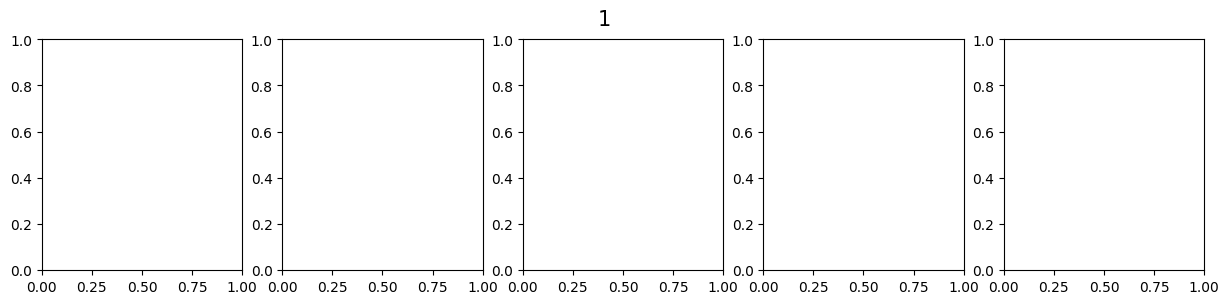

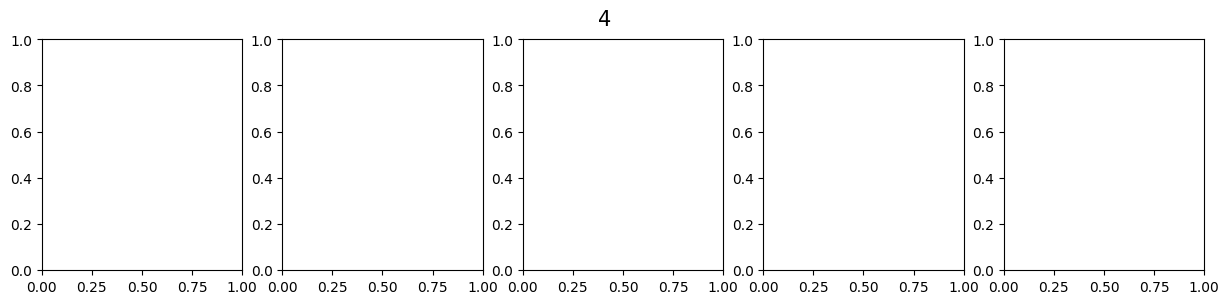

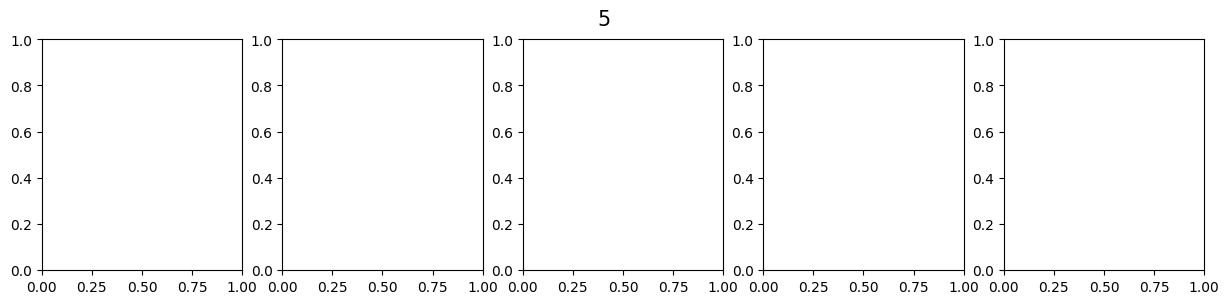

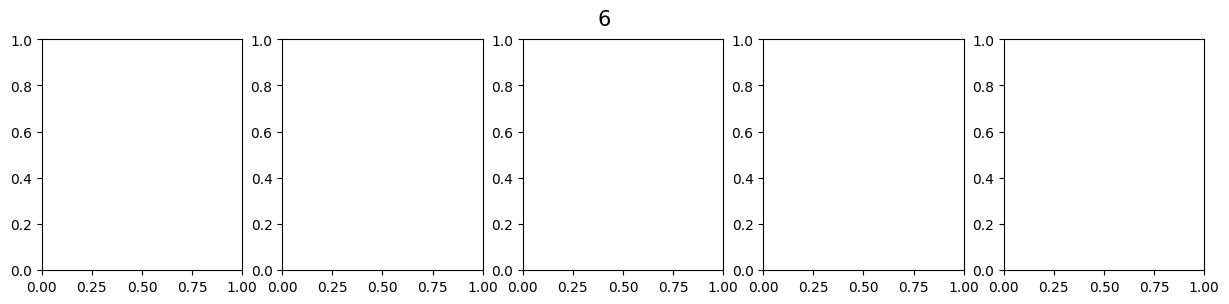

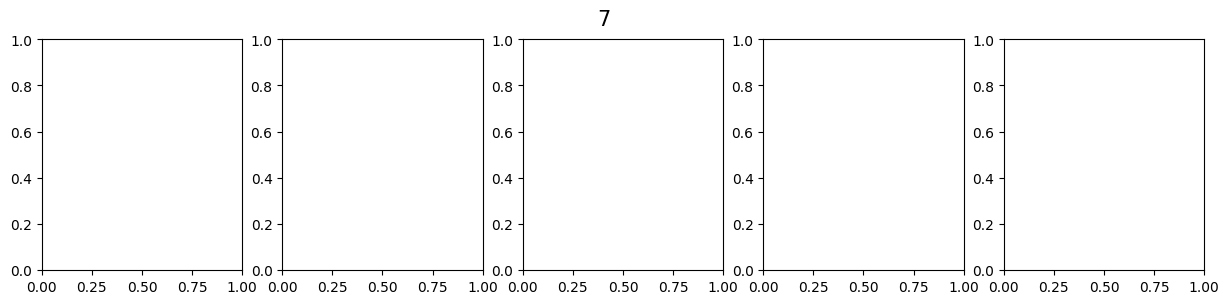

In [12]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [6]:
class STL10_loader(Dataset):
    def __init__(self, class_mapping root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        # YOUR CODE HERE
        self.data = datasets.STL10(
            root=root,
            split='train' if train else 'test',
            download=False
        )

        self.transform = transform
        self.class_mapping = class_mapping  
        self.filtered_data = [(img, label) for img, label in zip(self.data.data, self.data.labels)
                              if label in class_mapping.keys()]
        
        
    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        # YOUR CODE HERE
        return len(self.filtered_data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        # YOUR CODE HERE
        img, label = self.filtered_data[idx]

        if self.transform:
            img = self.transform(img)
            
        return img, label

SyntaxError: invalid syntax (1678900781.py, line 2)

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [21]:
# YOUR CODE HERE

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [22]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |

### - End of Notebook -